In [1]:
from ase.io.trajectory import TrajectoryWriter as tw
from ase.io.trajectory import TrajectoryReader as tr

import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import InsetPosition

from publish_format import useLargeSize

/var/folders/s_/s1p_xb8n08x8djc3cxcpsm900000gn/T/ipykernel_27441/584238185.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import InsetPosition


In [2]:
def extract_energy(filename):
    energy = []
    trajs = tr(filename)
    for traj in trajs:
        energy.append(traj.get_potential_energy())
    return np.array(energy)


def extract_forces_norm(filename):
    forces = []
    trajs = tr(filename)
    for traj in trajs:
        forces.append(np.linalg.norm(np.array(traj.get_forces())))
    return np.array(forces)

def extract_forces(filename):
    forces = []
    trajs = tr(filename)
    for traj in trajs:
        forces.append(np.array(traj.get_forces()))
    return np.array(forces)

def extract_distance(filename, atom1, atom2):
    distances = []
    trajs = tr(filename)
    print(trajs[0].get_chemical_symbols())
    print("Get distance between atom {} and atom {}".format(atom1, atom2))
    for traj in trajs:
        distances.append(traj.get_distances(atom1, atom2)[0])
    return np.array(distances)

def extract_error_bar(filename):
    trajs = tr(filename)
    uncertainty = []
    for traj in trajs:
        uncertainty.append(traj.info["uncertainty"])
    return np.array(uncertainty)

Training dataset

In [3]:
dft_file = "../data/dmc/dmc_400blocks_set3.traj"
forces_dft = extract_forces_norm(dft_file)
forces_dft_mae = extract_forces(dft_file)
energies_dft = extract_energy(dft_file)
distances_dft = extract_distance(dft_file, 0, 1)

amptorch_dmc = "../train/amptorch_dmc/test_results/h2o_amptorch_dmc_train.traj"
forces_amptorch_dft_force = extract_forces_norm(amptorch_dmc)
forces_amptorch_dft_force_mae = extract_forces(amptorch_dmc)
energies_amptorch_dft_force = extract_energy(amptorch_dmc)
distances_amptorch_dft_force = extract_distance(amptorch_dmc, 0, 1)

['O', 'H', 'H']
Get distance between atom 0 and atom 1


FileNotFoundError: [Errno 2] No such file or directory: '../train/amptorch_dmc/test_results/h2o_amptorch_dmc_train.traj'

In [4]:
print(
    "MAE for amptorch DFT (force): \t energy {:.6f} \t force {:.6f}".format(
        np.sum(np.abs(energies_amptorch_dft_force - energies_dft))
        / len(energies_dft),
        np.mean(np.abs(forces_amptorch_dft_force_mae - forces_dft_mae)),
    )
)

print(
    len(energies_dft),
    len(energies_amptorch_dft_force),
    # len(energies_amptorch_dft_noforce),
)

MAE for amptorch DFT (force): 	 energy 0.406485 	 force 0.806682
MAE for amptorch DFT (noforce):  energy 0.305079 	 force 4.193186
12001 12001 12001


test dataset

In [8]:
dft_file = "../data/dft/test_dft_pyscf_ase_force.traj"
forces_dft = extract_forces_norm(dft_file)
forces_dft_mae = extract_forces(dft_file)
energies_dft = extract_energy(dft_file)
distances_dft = extract_distance(dft_file, 0, 1)

amptorch_dft_force_file = "../train/amptorch_dft_force/test_results/h2o_amptorch_dmc_test.traj"
forces_amptorch_dft_force = extract_forces_norm(amptorch_dft_force_file)
forces_amptorch_dft_force_mae = extract_forces(amptorch_dft_force_file)
energies_amptorch_dft_force = extract_energy(amptorch_dft_force_file)
distances_amptorch_dft_force = extract_distance(amptorch_dft_force_file, 0, 1)

amptorch_dft_noforce_file = "../train/amptorch_dft_noforce/test_results/h2o_amptorch_dmc_test.traj"
forces_amptorch_dft_noforce = extract_forces_norm(amptorch_dft_noforce_file)
forces_amptorch_dft_noforce_mae = extract_forces(amptorch_dft_noforce_file)
energies_amptorch_dft_noforce = extract_energy(amptorch_dft_noforce_file)
distances_amptorch_dft_noforce = extract_distance(amptorch_dft_noforce_file, 0, 1)

['O', 'H', 'H']
Get distance between atom 0 and atom 1
['O', 'H', 'H']
Get distance between atom 0 and atom 1
['O', 'H', 'H']
Get distance between atom 0 and atom 1


In [9]:
print(
    "MAE for amptorch DFT (force): \t energy {:.6f} \t force {:.6f}".format(
        np.sum(np.abs(energies_amptorch_dft_force - energies_dft))
        / len(energies_dft),
        np.mean(np.abs(forces_amptorch_dft_force_mae - forces_dft_mae)),
    )
)

print(
    "MAE for amptorch DFT (noforce):  energy {:.6f} \t force {:.6f}".format(
        np.sum(np.abs(energies_amptorch_dft_noforce - energies_dft))
        / len(energies_dft),
        np.mean(np.abs(forces_amptorch_dft_noforce_mae - forces_dft_mae)),
    )
)

print(
    len(energies_dft),
    len(energies_amptorch_dft_force),
    len(energies_amptorch_dft_noforce),
)

MAE for amptorch DFT (force): 	 energy 0.106986 	 force 0.326956
MAE for amptorch DFT (noforce):  energy 0.127348 	 force 2.374504
2000 2000 2000


In [5]:
energies_dft -= min(energies_dft)
energies_amptorch_dft_force -= min(energies_amptorch_dft_force)
energies_amptorch_dft_noforce -= min(energies_amptorch_dft_noforce)

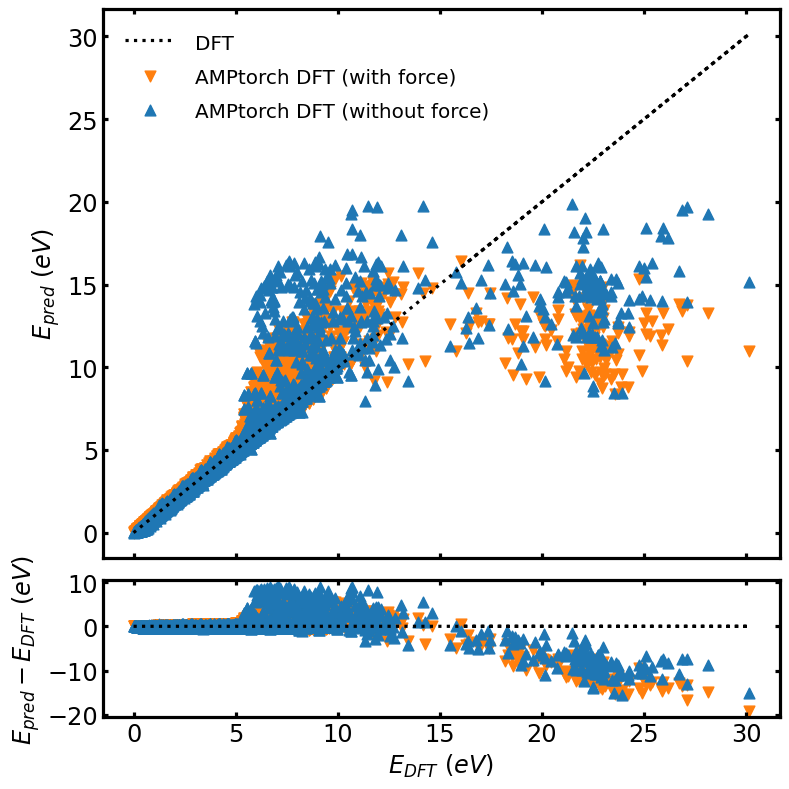

In [6]:
plt.style.use('default')

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,8), gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0)

axs[0].plot(energies_dft, energies_dft, linestyle="dotted", c="k", label="DFT")
axs[0].scatter(energies_dft, energies_amptorch_dft_force, marker="v", s=60, c="tab:orange", label="AMPtorch DFT (with force)")
axs[0].scatter(energies_dft, energies_amptorch_dft_noforce, marker="^", s=60, c="tab:blue", label="AMPtorch DFT (without force)")



axs[0].set_ylabel(r"$E_{pred}\ (eV)$")
axs[0].tick_params(axis="y")
axs[0].yaxis.set_ticks_position("both")
axs[0].xaxis.set_ticks_position("both")
axs[0].legend(loc=0, frameon=False, fontsize=18)

axs[1].plot(energies_dft, energies_dft - energies_dft, linestyle="dotted", c="k", label="DFT")
axs[1].scatter(energies_dft, (energies_amptorch_dft_force-energies_dft), marker="v", s=60, c="tab:orange", label="AMPtorch DFT (with force)")
axs[1].scatter(energies_dft, (energies_amptorch_dft_noforce-energies_dft), marker="^", s=60, c="tab:blue", label="AMPtorch DFT (without force)")


axs[1].set_xlabel(r"$E_{DFT}\ (eV)$")
axs[1].set_ylabel(r"$E_{pred} - E_{DFT}\ (eV)$")

axs[0].xaxis.set_ticks_position("both")
axs[0].yaxis.set_ticks_position("both")
axs[1].xaxis.set_ticks_position("both")
axs[1].yaxis.set_ticks_position("both")
useLargeSize(plt, axs[0])
useLargeSize(plt, axs[1])

plt.tight_layout()
# plt.savefig("./figures/c2_dft_energy_parity.png", dpi=300)
plt.show()

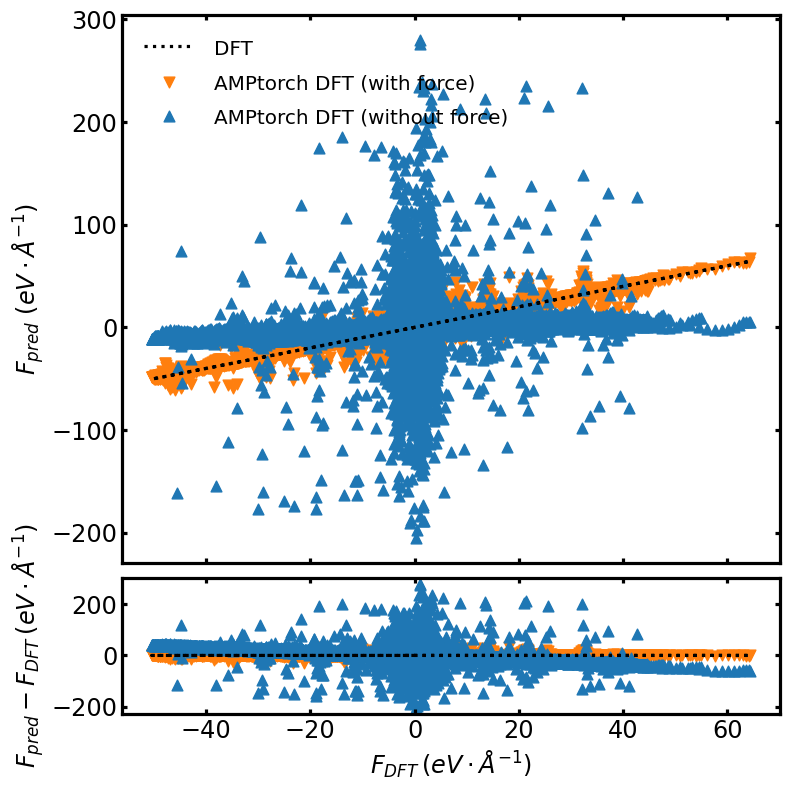

In [7]:
plt.style.use('default')

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,8), gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0)

axs[0].plot(forces_dft_mae.flatten(), forces_dft_mae.flatten(), linestyle="dotted", c="k", label="DFT")
axs[0].scatter(forces_dft_mae.flatten(), forces_amptorch_dft_force_mae.flatten(), marker="v", s=60, c="tab:orange", label="AMPtorch DFT (with force)")
axs[0].scatter(forces_dft_mae.flatten(), forces_amptorch_dft_noforce_mae.flatten(), marker="^", s=60, c="tab:blue", label="AMPtorch DFT (without force)")

axs[0].set_ylabel(r"$F_{pred}\ (eV\cdot\AA^{-1}$)")
axs[0].tick_params(axis="y")
axs[0].yaxis.set_ticks_position("both")
axs[0].xaxis.set_ticks_position("both")
axs[0].legend(loc=0, frameon=False, fontsize=18)

axs[1].plot(forces_dft_mae.flatten(), forces_dft_mae.flatten() - forces_dft_mae.flatten(), linestyle="dotted", c="k", label="DFT")
axs[1].scatter(forces_dft_mae.flatten(), forces_amptorch_dft_force_mae.flatten()-forces_dft_mae.flatten(), marker="v", s=60, c="tab:orange", label="AMPtorch DFT (with force)")
axs[1].scatter(forces_dft_mae.flatten(), forces_amptorch_dft_noforce_mae.flatten()-forces_dft_mae.flatten(), marker="^", s=60, c="tab:blue", label="AMPtorch DFT (without force)")


axs[1].set_xlabel(r"$F_{DFT}\,(eV\cdot\AA^{-1}$)")
axs[1].set_ylabel(r"${F_{pred} - F_{DFT}}\,(eV\cdot\AA^{-1})$")

axs[1].yaxis.set_ticks_position("both")
axs[1].xaxis.set_ticks_position("both")

useLargeSize(plt, axs[0])
useLargeSize(plt, axs[1])

# plt.savefig("./figures/c2_dft_force_parity.png", dpi=300)
plt.show()